# Planet : Amazon space - Pre-Processing

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

## Loading the dataset
In this part we are going to explore the data

In [4]:
labels_dt = pd.read_csv(f'{data_folder}/train_labels.csv',dtype=str)
labels_dt

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


Here are the 17 possible labels

In [5]:
tags = labels_dt['tags'].str.split(expand=True).stack().unique()
tags

array(['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation',
       'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy',
       'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming',
       'selective_logging', 'blow_down'], dtype=object)

Let us split the tags into individual columns, containing 1 if the label is present and 0 otherwise.

In [6]:
for tag in tags:
    a = [(tag in i.split()) for i in labels_dt['tags']]
    new_col = np.zeros(len(a),dtype=int)+a
    #print(new_col.shape)
    labels_dt[tag]=new_col
labels_dt

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


Here we count the number of appearance of each label combination.

In [7]:
tagg = labels_dt.tags.value_counts()
set_choice = np.zeros([len(tagg),4])
tagg

clear primary                                               13636
partly_cloudy primary                                        3630
cloudy                                                       2089
clear primary water                                          1850
agriculture clear primary road                               1680
                                                            ...  
agriculture clear cultivation cultivation road                  1
artisinal_mine bare_ground partly_cloudy primary road           1
agriculture clear conventional_mine primary road                1
clear conventional_mine habitation road                         1
agriculture partly_cloudy primary road conventional_mine        1
Name: tags, Length: 449, dtype: int64

Total number of unique labels are:  17


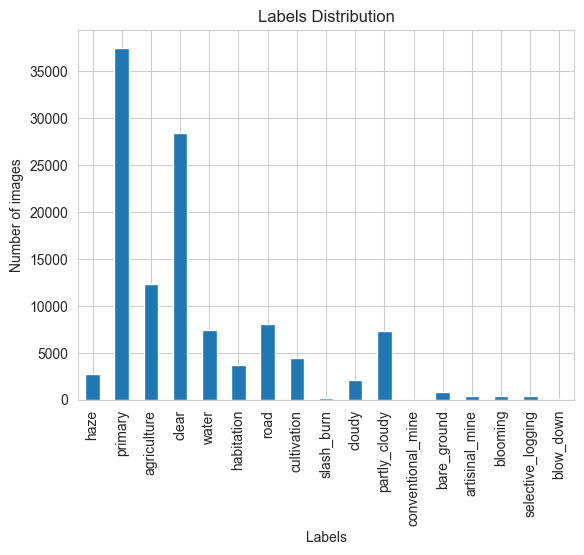

In [10]:
distribution = labels_dt[['haze','primary','agriculture','clear','water','habitation','road','cultivation','slash_burn','cloudy','partly_cloudy','conventional_mine','bare_ground','artisinal_mine','blooming','selective_logging','blow_down']].sum()
print("Total number of unique labels are: ", len(distribution))
distribution.plot(kind='bar')
plt.title("Labels Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of images")
plt.show()

As we can see, the distribution is far fom uniform, that is why we are going to split the data for training/validation/testing in a certain way to obtain the same distribution in all the sub-sets.

## Splitting the Data

In [9]:
# Here we split each individual label combination across the three sub-sets with a 60:20:20 ratio

for t in range(len(tagg)):
    number = tagg[t]
    set_choice[t,0] = number
    set_choice[t,1] = number//(1/0.6)
    set_choice[t,2] = (number - set_choice[t,1])//2
    set_choice[t,3] = number - set_choice[t,1] - set_choice[t,2]


In [10]:
set_choice

array([[1.3636e+04, 8.1810e+03, 2.7270e+03, 2.7280e+03],
       [3.6300e+03, 2.1770e+03, 7.2600e+02, 7.2700e+02],
       [2.0890e+03, 1.2530e+03, 4.1800e+02, 4.1800e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [11]:
a = np.arange(13636) # Random sample
np.random.shuffle(a)

p1 = a[:8181]
p2 = a[8181:8181+2727]
p3 = a[8181+2727:]
p2

array([ 4275, 13481,   310, ...,  1994,   487, 12360])

In [12]:
train = np.array([])
validation = np.array([])
test = np.array([])

for i in range(len(tagg)):
    a = labels_dt[labels_dt.tags==tagg.index[i]].index.array
    np.random.shuffle(a)
    p1 = a[:int(set_choice[i,1])]
    p2 = a[int(set_choice[i,1]):int(set_choice[i,1])+int(set_choice[i,2])]
    p3 = a[int(set_choice[i,1])+int(set_choice[i,2]):]
    train = np.append(train,p1)
    validation = np.append(validation,p2)
    test = np.append(test,p3)

C:\Users\Shady\AppData\Local\Temp\ipykernel_16588\1802940691.py:7: UserWarning: you are shuffling a 'PandasArray' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)


### Distribution in three sub-dataframes

In [13]:
train_df = labels_dt.iloc[train]
validation_df = labels_dt.iloc[validation]
test_df = labels_dt.iloc[test]

We are going to test the repartition here, to see if we achieved similar label distribution across the sub-sets.

In [14]:
repartition = np.zeros([len(tags),3])
for t in range(len(tags)):
    repartition[t,0] = (train_df[tags[t]]).sum()
    repartition[t,1] = (validation_df[tags[t]]).sum()
    repartition[t,2] = (test_df[tags[t]]).sum()

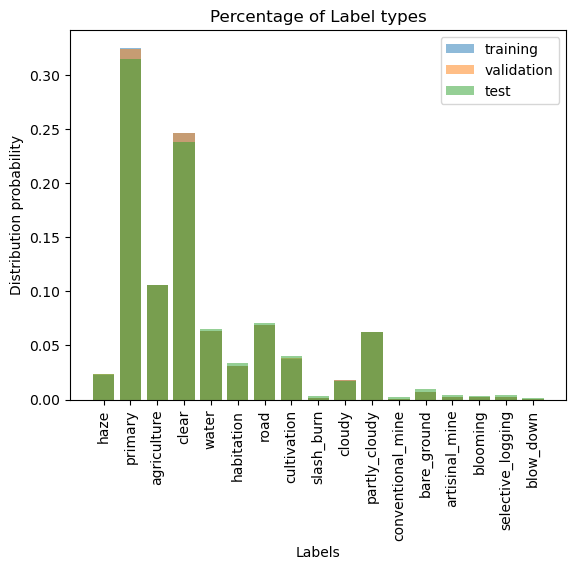

In [25]:
plt.figure()
plt.bar(np.arange(17),repartition[:,0]/sum(repartition[:,0]),alpha=0.5, label='training')
plt.bar(np.arange(17),repartition[:,1]/sum(repartition[:,1]),alpha=0.5, label ='validation')
plt.bar(np.arange(17),repartition[:,2]/sum(repartition[:,2]),alpha=0.5, label ='test')
plt.xticks(rotation = 90)
plt.title("Percentage of Label types")
plt.xlabel("Labels")
plt.ylabel("Distribution probability")
plt.legend()
plt.xticks(np.arange(17), tags)
plt.show()

We can see the overlap in distributions, which means we succeeded! We can now save them in csv form.

In [17]:
train_df.to_csv(data_folder+'/train.csv')
validation_df.to_csv(data_folder+'/validation.csv')
test_df.to_csv(data_folder+'/test.csv')

## Weights
For the training we decided to test weighted loss, so here is the computation of the weights into tensors.

In [19]:
class_weight = 1-(distribution.values/len(labels_dt))
class_weight_norm = class_weight/np.linalg.norm(class_weight)

x1 = torch.tensor(class_weight)
x2 = torch.tensor(class_weight_norm)

torch.save(x1, 'class_weight.pt')
torch.save(x2, 'class_weight_norm.pt')